In [1]:
import pandas as pd
import numpy as np
import glob
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS

plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
#Use glob to match the pattern ‘csv’
#read file
df_tweets = pd.read_csv("/content/drive/MyDrive/tweets/World Cup 2022 Tweets.csv")
#display the first 5 tweets
df_tweets.head(5)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source
0,Craig Forrest,NaN,2011-01-14 19:09:55+00:00,20346.0,18790,TRUE,2023-01-18 15:49:26+00:00,Thanks Oso for sharing your experience at the ...,Twitter for iPhone
1,Hosayni Official,NaN,2022-06-22 23:22:12+00:00,7.0,93,FALSE,2023-01-18 15:33:42+00:00,1 month ago at #QatarWorldCup2022 #Davido 001 ...,Twitter for Android
2,꧁Jineesh Janardhanan꧂,Harippad (Alappuzha ),2019-08-25 10:32:09+00:00,2414.0,15326,FALSE,2023-01-18 14:18:42+00:00,It's been exactly a month 🏆\n#Argentina #Qatar...,Twitter for Android
3,iLOT,NaN,2021-07-15 03:20:39+00:00,3201.0,421,FALSE,2023-01-18 13:46:52+00:00,Exactly one month 🏆\n#QatarWorldCup2022 https:...,TweetDeck
4,Chanda Dalmiya,"Kolkata, India",2020-03-07 10:50:09+00:00,397.0,13600,FALSE,2023-01-18 13:46:34+00:00,@a23_fantasy Answer :- D) 6 Times\n\n#ContestA...,Twitter for Android


In [2]:
df_tweets.shape

(124678, 9)

In [3]:
df_tweets.duplicated(subset=['text']).sum()
#clear duplicates
df_tweets=df_tweets.drop_duplicates(subset=['text'])
#replace all NaN values wit an empty string
df_tweets = df_tweets.replace(np.nan, '')
df_tweets.shape

(119970, 9)

In [4]:
# function for twitter text cleaning
def tweet_cleaner(text):
    #remove RT
    text = re.sub("RT @[\w]*:","",text)
    #remove twitter handles (@user)
    text = re.sub("(@[A-Za-z0-9_]+)","", text)
    #remove url links
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    # remove whitespaces
    text = ' '.join(text.split())
    return text
#Apply text cleaning function to text column in df_tweets dataframe
df_tweets['text'] = df_tweets['text'].apply(lambda x:tweet_cleaner(x))
df_tweets.shape

(119970, 9)

In [5]:
#downloading the vader lexicon from nltk
!pip install vaderSentiment
!pip install twython
nltk.download('vader_lexicon')#importing sentimentintensityanaylzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
df_tweets['scores'] = df_tweets['text'].apply(lambda text: sid.polarity_scores(text))
df_tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores
0,Craig Forrest,,2011-01-14 19:09:55+00:00,20346.0,18790,TRUE,2023-01-18 15:49:26+00:00,Thanks Oso for sharing your experience at the ...,Twitter for iPhone,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp..."
1,Hosayni Official,,2022-06-22 23:22:12+00:00,7.0,93,FALSE,2023-01-18 15:33:42+00:00,1 month ago at #QatarWorldCup2022 #Davido 001 💯,Twitter for Android,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,꧁Jineesh Janardhanan꧂,Harippad (Alappuzha ),2019-08-25 10:32:09+00:00,2414.0,15326,FALSE,2023-01-18 14:18:42+00:00,It's been exactly a month 🏆 #Argentina #Qatar ...,Twitter for Android,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,iLOT,,2021-07-15 03:20:39+00:00,3201.0,421,FALSE,2023-01-18 13:46:52+00:00,Exactly one month 🏆 #QatarWorldCup2022,TweetDeck,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Chanda Dalmiya,"Kolkata, India",2020-03-07 10:50:09+00:00,397.0,13600,FALSE,2023-01-18 13:46:34+00:00,Answer :- D) 6 Times #ContestAlert #ChaloSaath...,Twitter for Android,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [7]:
def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.05:
      return "Positive"
    elif sentiment['compound'] <= -0.05: 
      return "Negative"
    else:
      return "Neutral"
final_df = df_tweets
df_tweets['sentiment'] = final_df['scores'].apply(lambda x: sentimentPredict(x))
df_tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores,sentiment
0,Craig Forrest,,2011-01-14 19:09:55+00:00,20346.0,18790,TRUE,2023-01-18 15:49:26+00:00,Thanks Oso for sharing your experience at the ...,Twitter for iPhone,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",Positive
1,Hosayni Official,,2022-06-22 23:22:12+00:00,7.0,93,FALSE,2023-01-18 15:33:42+00:00,1 month ago at #QatarWorldCup2022 #Davido 001 💯,Twitter for Android,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,꧁Jineesh Janardhanan꧂,Harippad (Alappuzha ),2019-08-25 10:32:09+00:00,2414.0,15326,FALSE,2023-01-18 14:18:42+00:00,It's been exactly a month 🏆 #Argentina #Qatar ...,Twitter for Android,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,iLOT,,2021-07-15 03:20:39+00:00,3201.0,421,FALSE,2023-01-18 13:46:52+00:00,Exactly one month 🏆 #QatarWorldCup2022,TweetDeck,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
4,Chanda Dalmiya,"Kolkata, India",2020-03-07 10:50:09+00:00,397.0,13600,FALSE,2023-01-18 13:46:34+00:00,Answer :- D) 6 Times #ContestAlert #ChaloSaath...,Twitter for Android,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


(-0.5, 399.5, 199.5, -0.5)

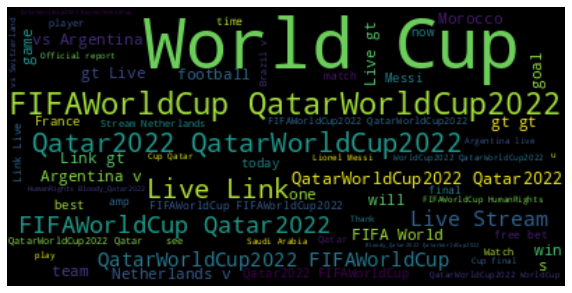

In [8]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

tweet_All = " ".join(review for review in df_tweets.text)


fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

REMOVING PUNCTUATIONS AND MAKING TEXT LOWERCASE

In [9]:
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text
df_tweets['text'] = df_tweets['text'].apply(lambda x:clean_text(x))
df_tweets['text']

0         thanks oso for sharing your experience at the ...
1             1 month ago at qatarworldcup2022 davido 001 💯
2         its been exactly a month 🏆 argentina qatar qat...
3                     exactly one month 🏆 qatarworldcup2022
4         answer  d 6 times contestalert chalosaathkhele...
                                ...                        
124673    qatar might be the first host country to lose ...
124674    the pidgin commentary for fifa world cup is gi...
124675    just day one and already so much controversy s...
124676    best game of qatar i have seen since 1927 qata...
124677    like this tweet if you can’t wait to see brazi...
Name: text, Length: 119970, dtype: object

STEMMING AND LEMMATIZATION

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
df=pd.DataFrame()
df['text']=df_tweets['text']
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['text'].apply(lambda x: tokenization(x.lower()))
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['No_stopwords'] = df['tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming1(text):
    text = [ps.stem(word) for word in text]
    return text

df['stemmed_porter'] = df['No_stopwords'].apply(lambda x: stemming1(x))

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
def stemming2(text):
    text = [s_stemmer.stem(word) for word in text]
    return text
df['stemmed_snowball'] = df['No_stopwords'].apply(lambda x: stemming2(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['No_stopwords'].apply(lambda x: lemmatizer(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
df.head()

,text,tokenized,No_stopwords,stemmed_porter,stemmed_snowball,lemmatized
0,thanks oso for sharing your experience at the ...,"[thanks, oso, for, sharing, your, experience, ...","[thanks, oso, sharing, experience, qatarworldc...","[thank, oso, share, experi, qatarworldcup2022,...","[thank, oso, share, experi, qatarworldcup2022,...","[thanks, oso, sharing, experience, qatarworldc..."
1,1 month ago at qatarworldcup2022 davido 001 💯,"[1, month, ago, at, qatarworldcup2022, davido,...","[1, month, ago, qatarworldcup2022, davido, 001, ]","[1, month, ago, qatarworldcup2022, davido, 001, ]","[1, month, ago, qatarworldcup2022, davido, 001, ]","[1, month, ago, qatarworldcup2022, davido, 001, ]"
2,its been exactly a month 🏆 argentina qatar qat...,"[its, been, exactly, a, month, argentina, qata...","[exactly, month, argentina, qatar, qatarworldc...","[exactli, month, argentina, qatar, qatarworldc...","[exact, month, argentina, qatar, qatarworldcup...","[exactly, month, argentina, qatar, qatarworldc..."
3,exactly one month 🏆 qatarworldcup2022,"[exactly, one, month, qatarworldcup2022]","[exactly, one, month, qatarworldcup2022]","[exactli, one, month, qatarworldcup2022]","[exact, one, month, qatarworldcup2022]","[exactly, one, month, qatarworldcup2022]"
4,answer d 6 times contestalert chalosaathkhele...,"[answer, d, 6, times, contestalert, chalosaath...","[answer, 6, times, contestalert, chalosaathkhe...","[answer, 6, time, contestalert, chalosaathkhel...","[answer, 6, time, contestalert, chalosaathkhel...","[answer, 6, time, contestalert, chalosaathkhel..."


In [12]:
df_tweets['text']=df['lemmatized']
df_tweets.head()

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores,sentiment
0,Craig Forrest,,2011-01-14 19:09:55+00:00,20346.0,18790,TRUE,2023-01-18 15:49:26+00:00,"[thanks, oso, sharing, experience, qatarworldc...",Twitter for iPhone,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",Positive
1,Hosayni Official,,2022-06-22 23:22:12+00:00,7.0,93,FALSE,2023-01-18 15:33:42+00:00,"[1, month, ago, qatarworldcup2022, davido, 001, ]",Twitter for Android,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,꧁Jineesh Janardhanan꧂,Harippad (Alappuzha ),2019-08-25 10:32:09+00:00,2414.0,15326,FALSE,2023-01-18 14:18:42+00:00,"[exactly, month, argentina, qatar, qatarworldc...",Twitter for Android,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,iLOT,,2021-07-15 03:20:39+00:00,3201.0,421,FALSE,2023-01-18 13:46:52+00:00,"[exactly, one, month, qatarworldcup2022]",TweetDeck,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
4,Chanda Dalmiya,"Kolkata, India",2020-03-07 10:50:09+00:00,397.0,13600,FALSE,2023-01-18 13:46:34+00:00,"[answer, 6, time, contestalert, chalosaathkhel...",Twitter for Android,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


sentiment count

In [13]:
temp = df_tweets.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
2,Positive,54577
1,Neutral,45139
0,Negative,20254


FUNNEL CHART FOR BETTER VISUALIZATION OF SENTIMENT DISTRIBUTION

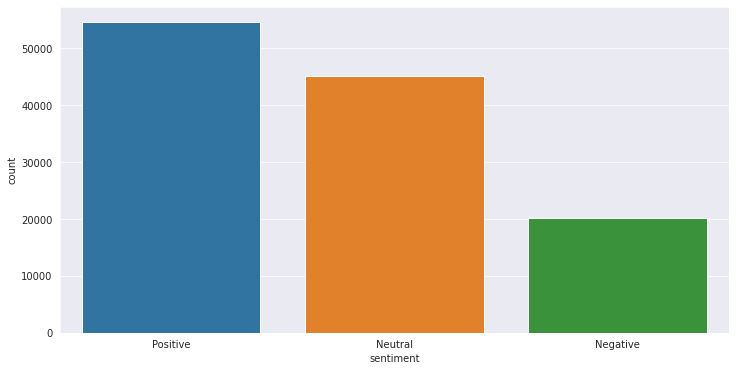

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df_tweets)
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [15]:
Positive_tweet = df_tweets[df_tweets['sentiment']=='Positive'].reset_index()
Negative_tweet = df_tweets[df_tweets['sentiment']=='Negative'].reset_index()
Neutral_tweet = df_tweets[df_tweets['sentiment']=='Neutral'].reset_index()

In [16]:
all_positive_words=[]
for i in range(len(Positive_tweet['text'])):
    a=Positive_tweet['text'][i]
    for i in a:
        all_positive_words.append(i)
all_positive_words=pd.Series(np.array(all_positive_words))
common_words=all_positive_words.value_counts().drop(labels='')[:70].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='70 Most Common Words In Positive Tweets')
fig.show()

In [17]:
all_negative_words=[]
for i in range(len(Negative_tweet['text'])):
    a=Negative_tweet['text'][i]
    for i in a:
        all_negative_words.append(i)
all_negative_words=pd.Series(np.array(all_negative_words))
common_words=all_negative_words.value_counts().drop(labels='')[:70].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='70 Most Common Words In Negative Tweets')
fig.show()

In [18]:
all_neutral_words=[]
for i in range(len(Neutral_tweet['text'])):
    a=Neutral_tweet['text'][i]
    for i in a:
        all_neutral_words.append(i)
all_neutral_words=pd.Series(np.array(all_neutral_words))
common_words=all_neutral_words.value_counts().drop(labels='')[:70].rename_axis('Common Neutral Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Neutral Words'], values='count',title='70 Most Common Words In Neutral Tweets')
fig.show()

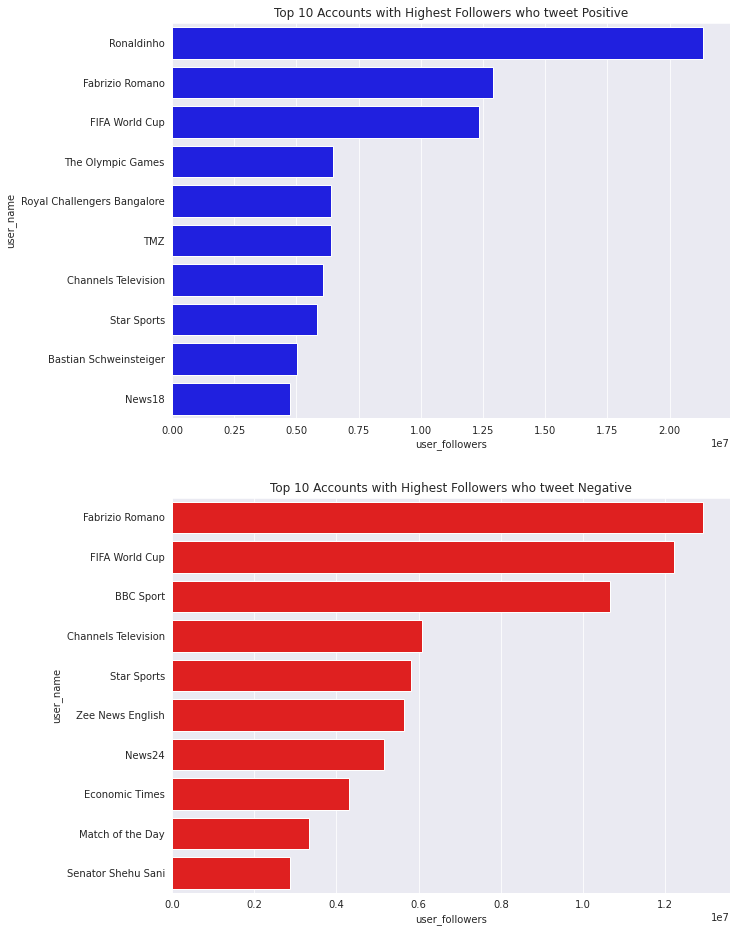

In [19]:
from matplotlib import rcParams

fig, (ax1, ax3) = plt.subplots(2,1, figsize=(10, 16))
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax1, palette=["b"],
           data=df_tweets[(df_tweets.sentiment== "Positive")]\
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax1.set_title('Top 10 Accounts with Highest Followers who tweet Positive')

sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax3, palette=["r"],
           data=df_tweets[(df_tweets.sentiment == "Negative")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax3.set_title('Top 10 Accounts with Highest Followers who tweet Negative')

fig.show()